In [2]:
# eda12_00 clear all variables and import vatious modules
%reset -f
import os
from datetime import date
from math import exp, pi, sin, cos, tan, sqrt, floor, ceil, log, atan2
import numpy as np
import scipy.sparse.linalg as las
import scipy.interpolate as ip
import scipy.spatial as sp
from scipy import sparse
import scipy.linalg as la
import scipy.signal as sg
import scipy.stats as stats
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

# eda_draw function makes a "pictorial matrix equation"
# arguments are vectors, matrices and strings
# which are plotted in the order that the appear
# except that strings starting with 'title ' are plotted
# under the subseqeunt matrix or vector
# always returns a status of 1

def eda_draw(*argv):
    bw = np.zeros((256,4));
    v = 0.9*(256 - np.linspace( 0, 255, 256 ))/255;
    bw[:,0] = v;
    bw[:,1] = v;
    bw[:,2] = v;
    bw[:,3] = np.ones(256);
    bwcmap = ListedColormap(bw);
    # size of plot
    W = 16;
    H = 4;
    fig1 = plt.figure(1);
    # figsize width and height in inches
    fig1.set_size_inches(W,H);
    ax1 = plt.subplot(1,1,1);
    plt.axis([0, W, -H/2, H/2]);
    plt.axis('off');
    LM = W/6;    # matrix width and heoght
    LV = W/40;   # vector width
    FS = 0.12;    # character width
    TO = 0.4;    # title vertical offset
    SP = 0.2;    # space between objects
    LS = 0.2;    # leading space
    p = LS; # starting x-position
    istitle=0; # flags presence of a title
    for a in argv:
        if isinstance(a,np.ndarray):
            sh = np.shape(a);
            if len(sh) == 1:  # conversion to nx1 array
                n = sh[0];
                m = 1;
                ap = a;
                a = np.zeros((n,1));
                a[:,0] = ap;
            else:
                n = sh[0];
                m = sh[1];
            if m==1:
                pold=p;
                left=p;
                right=p+LV;
                bottom=-LM/2;
                top=LM/2;
                plt.imshow( a, cmap=bwcmap, vmin=np.min(a), vmax=np.max(a), extent=(left,right,bottom,top) );
                p = p+LV;
                pm = (p+pold)/2;
                if istitle:
                    plt.text(pm,-(LM/2)-TO,titlestr,horizontalalignment='center');
                    istitle=0;
                p = p+SP;
            else:
                pold=p;
                left=p;
                right=p+LM;
                bottom=-LM/2;
                top=LM/2;
                plt.imshow( a, cmap=bwcmap, vmin=np.min(a), vmax=np.max(a), extent=(left,right,bottom,top) );
                p = p+LM;
                pm = (p+pold)/2;
                if istitle:
                    plt.text(pm,-(LM/2)-TO,titlestr,horizontalalignment='center');
                    istitle=0;
                p = p+SP;
        elif isinstance(a,str):
            ns = len(a);
            istitle=0;
            if( ns>=6 ):
                if 'title ' in a[0:6]:
                    istitle=1;
                    titlestr=a[6:];
            if( istitle != 1):
                plt.text(p,0,a);
                p = p + ns*FS + SP;
    plt.show();
    return 1;




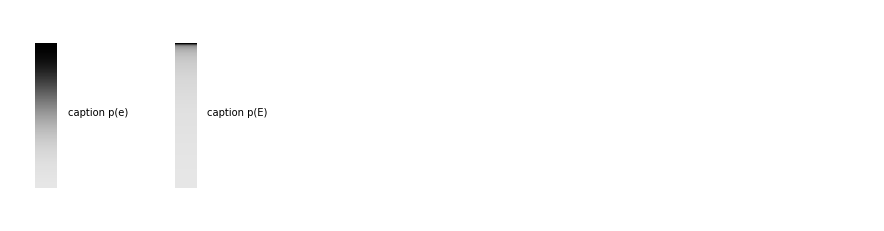

area under p(e): 1.0014
area under p(E): 0.9090


In [3]:
# eda12_01
# distribution of square of a random variable

L=101;
emin=0.01;
emax=3;
De=(emax-emin)/(L-1);
e = np.zeros((L,1));
e[:,0] = emin+De*np.linspace(0,L-1,L);

pe = sqrt(2/pi)*np.exp(-0.5*np.power(e,2));
Ae = De*np.sum(pe);

Emin=0.01;
Emax=3;
DE=(Emax-Emin)/(L-1);
E = np.zeros((L,1));
E[:,0]=Emin+DE*np.linspace(0,L-1,L);

pE = np.sqrt(np.reciprocal(2*pi*E)) * np.exp(-0.5*E);
AE = DE*sum(pE);

eda_draw(' ',pe,'caption p(e)',' ',pE,'caption p(E)');

print("area under p(e): %.4f" % (Ae) );
print("area under p(E): %.4f" % (AE) );

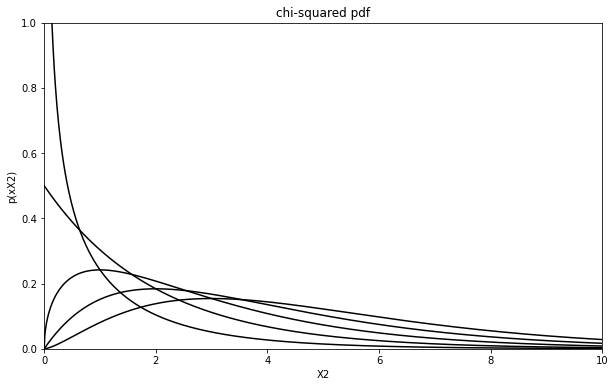

In [4]:
# eda12_02
# chisquared distribution

L=1001;
X2min=0;
X2max=10;
DX2=(X2max-X2min)/(L-1);
X2 = np.zeros((L,1));
X2[:,0]=X2min+DX2*np.linspace(0,L-1,L);

fig1 = plt.figure(1,figsize=(10,6));
plt.axis([X2min, X2max, 0, 1]);
plt.xlabel('X2');
plt.ylabel('p(xX2)');
plt.title('chi-squared pdf');

pX2 = np.zeros((L,1))
for N in range(1,6):
    pX2[:,0] = stats.chi2.pdf(X2.ravel(),N);
    plt.plot(X2,pX2,'k-');


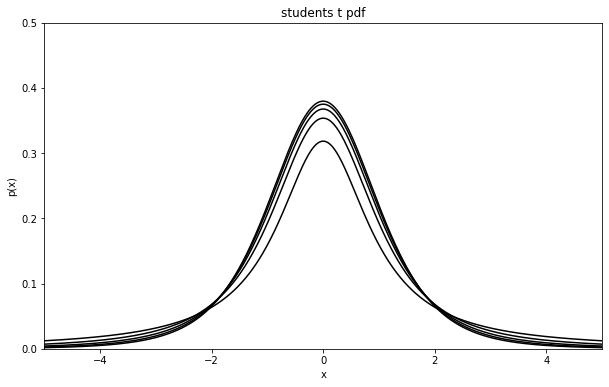

In [5]:
# eda12_03
# student t distribution

L=1001;
tmin=-5;
tmax=5;
Dt=(tmax-tmin)/(L-1);
t = np.zeros((L,1));
t[:,0]=tmin+Dt*np.linspace(0,L-1,L);

fig1 = plt.figure(1,figsize=(10,6));
plt.axis([tmin, tmax, 0, 0.5]);
plt.xlabel('x');
plt.ylabel('p(x)');
plt.title('students t pdf');

pt = np.zeros((L,1))
for N in range(1,6):
    pt[:,0] = stats.t.pdf(t.ravel(),N);
    plt.plot(t,pt,'k-');

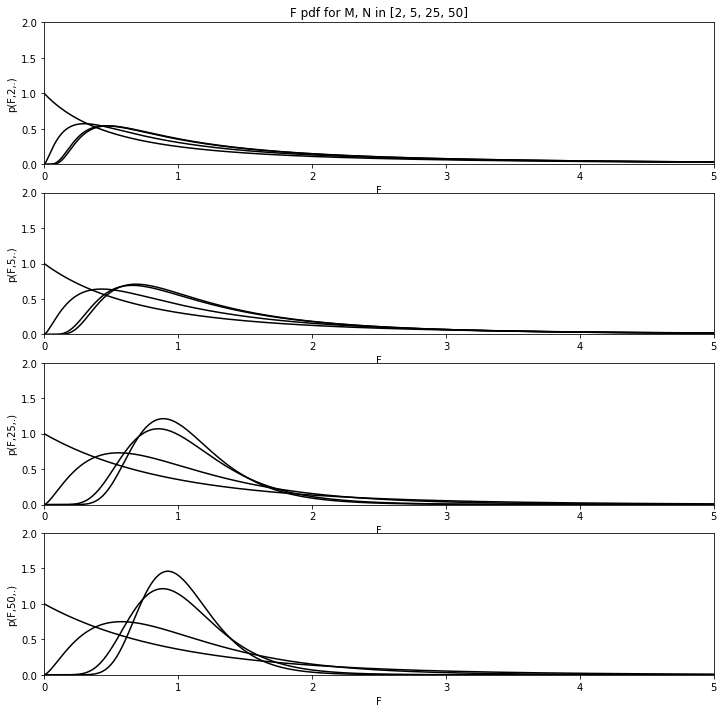

In [6]:
# eda12_04
# F distribution

L=1001;
Fmin=0;
Fmax=5;
DF=(Fmax-Fmin)/(L-1);
F=Fmin+DF*np.linspace(0,L-1,L);

fig1 = plt.figure(1,figsize=(12,12));

pF = np.zeros((L,1))
i = 1;
for M in  [2, 5, 25, 50]:
    ax1 = plt.subplot(4,1,i);
    plt.axis([Fmin, Fmax, 0, 2]);
    plt.xlabel('F');
    plt.ylabel("p(F,%d,.)" % (M) );
    if(i==1):
        plt.title('F pdf for M, N in [2, 5, 25, 50]' );
    i=i+1;
    for N in  [2, 5, 25, 50]:
        pF[:,0] = stats.f.pdf(F.ravel(),N,M);
        plt.plot(F,pF,'k-');



In [7]:
# eda12_05
# generates simulated data for particle size example

# note: to prevent this code from overwriting the existing
# files testA.txt and testB.txt, I have changed the filenames
# to testA_new.txt and testB_new.txt

N=25;
d=100;

s2dtrue=1;
sdtrue=sqrt(s2dtrue);

# calibration test 1
dobs1 = np.random.normal(d,sdtrue,(N,1));
np.savetxt("testA_new.txt",dobs1, delimiter="\t");

# calibration test 2
dobs2 = np.random.normal(d,sdtrue,(N,1));
np.savetxt("testB_new.txt",dobs2, delimiter="\t");



In [8]:
# eda12_06
# A few exemplary calulations of probability

# Z distribution, two-sided test
Z=0.278;
P = stats.norm.cdf(Z,0.0,1.0)-stats.norm.cdf(-Z,0.0,1.0);

print("Z distribution, with Z=%.4f, two sided test:" % (Z) );
print("  The probability that Z is inside  the interval %.4f to %.4f" % (-Z, Z) );
print("    is %.4f" % (P) );
print("  The probability that Z is outside the interval %.4f to %.4f" % (-Z, Z));
print("    is %.4f" % (1-P) );

# Chi-squared distribution, one-sided test
X2=21.9;
N=25;
P=stats.chi2.cdf(X2,N);

print("Chi-squared distribution with %d degrees of freedom, one sized test:" % (N) );
print("   The Probability that X2 is inside the interval 0 to %.4f" % (X2) );
print("     is %.4f" % (P) );
print("   The Probability that X2 is outside the interval 0 to %.4f" % (X2) );
print("     is %.4f" % (1-P));

Z distribution, with Z=0.2780, two sided test:
  The probability that Z is inside  the interval -0.2780 to 0.2780
    is 0.2190
  The probability that Z is outside the interval -0.2780 to 0.2780
    is 0.7810
Chi-squared distribution with 25 degrees of freedom, one sized test:
   The Probability that X2 is inside the interval 0 to 21.9000
     is 0.3585
   The Probability that X2 is outside the interval 0 to 21.9000
     is 0.6415


In [9]:
# eda12_07
# generates simulated data for particle size example

# Part A: first dataset

# load data
D=np.genfromtxt('testA.txt', delimiter='\t');
s = np.shape(D);
NA = s[0];
dobsA=np.zeros((NA,1));
dobsA[:,0] = D;

dtrueA = 100.0;     # known size of calibrations standard'
dbartrueA = dtrueA; # known mean of measurement
sd2trueA=1;         # known variance of measurement
sdtrueA=1;          # known root-variance of measurement

# calculate useful statistics
print('file testA.txt');

# number of observations
print("N is %d" % (NA) );

dbartrueA = dtrueA;
print("true mean %.4f" % (dbartrueA) );

dbarestA = np.sum(dobsA)/NA;
print("estimated mean %.4f" % (dbarestA) );

print("true variance %.4f" % (sd2trueA) );
print("true root-variance %.4f" % (sdtrueA) );

sd2estA = np.matmul( (dobsA-dbartrueA).T, (dobsA-dbartrueA)) / (NA);
print("estimated variance (given true mean) %.4f" % sd2estA );

sdestA = sqrt(sd2estA);
print("estimated root-variance (given true mean) %.4f" % (sdestA) );

sd2estpA= np.matmul( (dobsA-dbarestA).T, (dobsA-dbarestA)) / (NA-1);
print("estimated variance (given estimated mean) %.4f" % (sd2estpA) );

sdestpA=sqrt(sd2estpA);
print("estimated root-variance (given estimated mean) %.4f" % (sdestpA));

ZA = abs(dbarestA-dbartrueA)/(sdtrueA/sqrt(NA));
print("Z is %.4f" % (ZA) );

PZA = 1 - (stats.norm.cdf(ZA,0.0,1.0)-stats.norm.cdf(-ZA,0.0,1.0));
print("Probability of |Z| exceeding %.4f is %.4f" % (ZA, PZA) );

chi2A = np.matmul( ((dobsA-dtrueA).T/sdtrueA), ((dobsA-dtrueA)/sdtrueA) );
print("chi-squared is %.4f" % (chi2A) );

Pchi2A = 1 - stats.chi2.cdf(chi2A,NA);
print("Probability of chi2 exceeding %.4f is %.4f" % (chi2A, Pchi2A) );

tA = abs(dbarestA-dbartrueA)/(sdestA/sqrt(NA));
print("t is %.4f" % (tA) );

PtA = 1.0 - ( stats.t.cdf(tA,NA) - stats.t.cdf(-tA,NA) );
print("Probability of |t| exceeding %.4f is %.4f" % (tA, PtA) );

print(' ');

# Part B: second dataset

# load data
D=np.genfromtxt('testB.txt', delimiter='\t');
s = np.shape(D);
NB = s[0];
dobsB=np.zeros((NB,1));
dobsB[:,0] = D;

dtrueB = 100;             # known size of calibrations standard'
dbartrueB = dtrueB;       # known mean
sd2trueB = 1.0;           # known variance of measurement
sdtrueB = sqrt(sd2trueB); # known root-variance of measurement

# calculate useful statistics
print('file testB.txt');

# number of observations
print("N is %d" % (NB) );

print("true mean %.4f" % (dbartrueB) );

dbarestB = np.sum(dobsB)/NB;
print("estimated mean %.4f" % (dbarestB) );

print("true variance %.4f" % (sd2trueB) );
print("true root-variance %.4f" % (sdtrueB) );

sd2estB = np.matmul( (dobsB-dbartrueB).T, (dobsB-dbartrueB)) / (NB);
print("estimated variance (given true mean) %.4f" % sd2estB );

sdestB = sqrt(sd2estB);
print("estimated root-variance (given true mean) %.4f" % (sdestB) );

sd2estpB= np.matmul( (dobsB-dbarestB).T, (dobsB-dbarestB)) / (NB-1);
print("estimated variance (given estimated mean) %.4f" % (sd2estpB) );

sdestpB=sqrt(sd2estpB);
print("estimated root-variance (given estimated mean) %.4f" % (sdestpB));

ZB = abs(dbarestB-dbartrueB)/(sdtrueB/sqrt(NB));
print("Z is %.4f" % (ZB) );

PZB = 1 - (stats.norm.cdf(ZB,0.0,1.0)-stats.norm.cdf(-ZB,0.0,1.0));
print("Probability of |Z| exceeding %.4f is %.4f" % (ZB, PZB) );

chi2B = np.matmul( ((dobsB-dtrueB).T/sdtrueB), ((dobsB-dtrueB)/sdtrueB) );
print("chi-squared is %.4f" % (chi2B) );

Pchi2B = 1 - stats.chi2.cdf(chi2B,NB);
print("Probability of chi2 exceeding %.4f is %.4f" % (chi2B, Pchi2B) );

tB = abs(dbarestB-dbartrueB)/(sdestB/sqrt(NB));
print("t is %.4f" % (tB) );

PtB = 1.0 - ( stats.t.cdf(tB,NB) - stats.t.cdf(-tB,NB) );
print("Probability of |t| exceeding %.4f is %.4f" % (tB, PtB) );

print(' ');

# PART 3 comparison of the tw datsets

# are the means of the two tests significantly different ?

print("significance of difference between two means, using Z-test");
A = dbarestA - dbarestB;
B = sqrt(sd2trueA/NA+sd2estpB/NB);
Z = abs(A/B);
print("Z is %.4f" % (Z) );

# are the means of the two tests significantly different ?
PZ = 1 - (stats.norm.cdf(Z,0,1)-stats.norm.cdf(-Z,0,1));
print("Probability of |Z| exceeding %.4f is %.4f" % (Z, PZ) );
print(' ');

print("difference between two means with t-test");
A = dbarestA - dbarestB;
B = sqrt(sd2estpA/NA+sd2estpB/NB);
t = abs(A/B);
C = (sd2estpA/NA+sd2estpB/NB)**2;
D = ((sd2estpA/NA)**2)/(NA-1) + ((sd2estpB/NB)**2)/(NB-1);
M  =floor(C/D+0.5);
print("t is %.4f and has %d degrees of freedom" % (t, M) );

# are the means of the two tests significantly different ?
Pt = 1 - (stats.t.cdf(t,M)-stats.t.cdf(-t,M));
print("Probability of |t| exceeding %.4f is %.4f" % (t, Pt) );
print(' ');

# are the variances of the two tests significantly different ?
F = (chi2A/NA) / (chi2B/NB);
if( F<1 ):
    F=1/F;
print("1/F is %.4f and F is %.4f" % (1/F, F) );

PF = 1 - (stats.f.cdf(F,NA,NB)-stats.f.cdf(1/F,NA,NB));
print("Probability of F outside interval (%.4f,%.4f) is %.4f" % (1/F, F, PF) );


file testA.txt
N is 25
true mean 100.0000
estimated mean 100.1620
true variance 1.0000
true root-variance 1.0000
estimated variance (given true mean) 0.8108
estimated root-variance (given true mean) 0.9004
estimated variance (given estimated mean) 0.8172
estimated root-variance (given estimated mean) 0.9040
Z is 0.8098
Probability of |Z| exceeding 0.8098 is 0.4181
chi-squared is 20.2689
Probability of chi2 exceeding 20.2689 is 0.7326
t is 0.8994
Probability of |t| exceeding 0.8994 is 0.3770
 
file testB.txt
N is 25
true mean 100.0000
estimated mean 99.7455
true variance 1.0000
true root-variance 1.0000
estimated variance (given true mean) 1.1273
estimated root-variance (given true mean) 1.0618
estimated variance (given estimated mean) 1.1068
estimated root-variance (given estimated mean) 1.0521
Z is 1.2727
Probability of |Z| exceeding 1.2727 is 0.2031
chi-squared is 28.1837
Probability of chi2 exceeding 28.1837 is 0.2995
t is 1.1987
Probability of |t| exceeding 1.1987 is 0.2419
 
signi

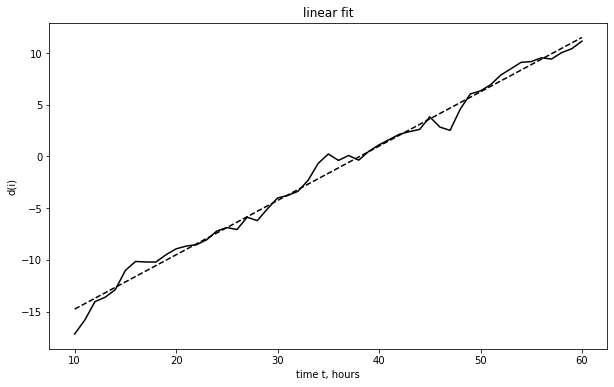

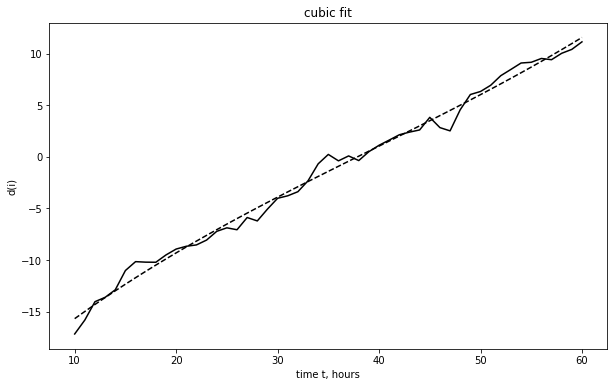

linear error 31.52, degrees of freedom 49
cubic  error 27.18, degrees of freedom 47
improvement in error 0.14
1/F 0.8991 F 1.1122
P(F<0.8991 or F>1.1122) = 0.714073
Null hypothesis: fits the same up to stastical flucuation
Null hypothesi cannot be excluded to 95% confidence


In [10]:
# eda12_08
# illustration of F-test to assess difference in fit of two models
# using a small fragment of Black Rock Forest temperature data

D=np.genfromtxt('brf_fragment.txt', delimiter='\t');
s = np.shape(D);
N = s[0];
t = np.zeros((N,1));
t[:,0] = 10+np.linspace(0,N-1,N);  # hours from start of orignal record
dobs = np.zeros((N,1));
dobs[:,0] = D;

fig1 = plt.figure(1,figsize=(10,6));
plt.plot(t,dobs,'k-');
plt.title('linear fit');
plt.xlabel('time t, hours');
plt.ylabel('d(i)');

# fit 1, straight line
M=2;
G=np.zeros((N,M));
G[:,0]=np.ones((N,1)).ravel();
G[:,1]=t.ravel();
mestA=la.solve( np.matmul(G.T,G), np.matmul(G.T, dobs) );
dpreA = np.matmul( G, mestA );
plt.plot(t,dpreA,'k--');
EA = np.matmul( (dobs-dpreA).T, (dobs-dpreA) );
vA = N-M;
plt.show();

fig2 = plt.figure(2,figsize=(10,6));
plt.plot(t,dobs,'k-');
plt.title('cubic fit');
plt.xlabel('time t, hours');
plt.ylabel('d(i)');

# fit 2, cubic
M=4;
G=np.zeros((N,M));
G[:,0]=np.ones((N,1)).ravel();
G[:,1]=t.ravel();
G[:,2]=np.power(t,2).ravel();
G[:,3]=np.power(t,3).ravel();
mestB=la.solve( np.matmul(G.T,G), np.matmul(G.T, dobs) );
dpreB = np.matmul( G, mestB );
plt.plot(t,dpreB,'k--');
EB = np.matmul( (dobs-dpreB).T, (dobs-dpreB) );
vB = N-M;
plt.show();

print("linear error %.2f, degrees of freedom %d" % (EA, vA) );
print("cubic  error %.2f, degrees of freedom %d" % (EB, vB) );


print("improvement in error %.2f" % ((EA-EB)/EA) );
F = (EA/vA) / (EB/vB);
print("1/F %.4f F %.4f" % (1/F,F) );

if( F<1 ):
    F=1/F

P = 1 - (stats.f.cdf(F,vA,vB)-stats.f.cdf(1/F,vA,vB));
print("P(F<%.4f or F>%.4f) = %f" % (1/F, F, P) );

print('Null hypothesis: fits the same up to stastical flucuation')
if( P>0.05):
    print('Null hypothesi cannot be excluded to 95% confidence')
else:
    print('Null hypothesi can be excluded to 95% confidence')

true      data variance 64.0000
estimated data variance 61.4060
variance of data estimated from PSD 61.45
 
power spectral density
true mean 3.1938 variance 10.2001
estimated mean 3.0664 variance 8.6467
 


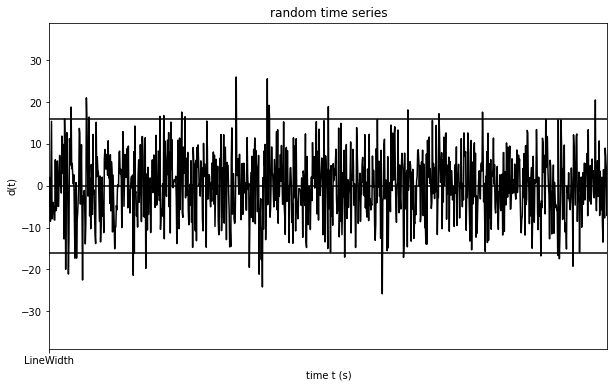

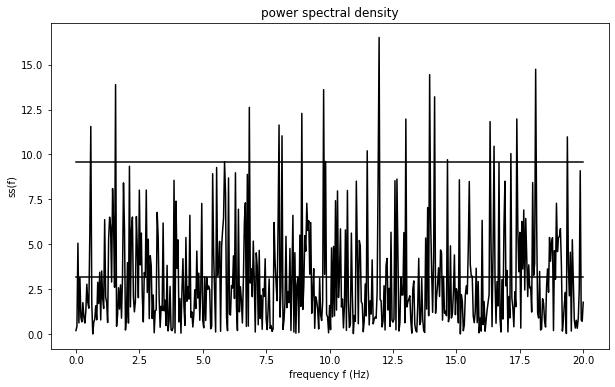

0.9500 confidence level is at s2 = 9.5677
95.9064 percent of points are below 0.9500 confidence
 


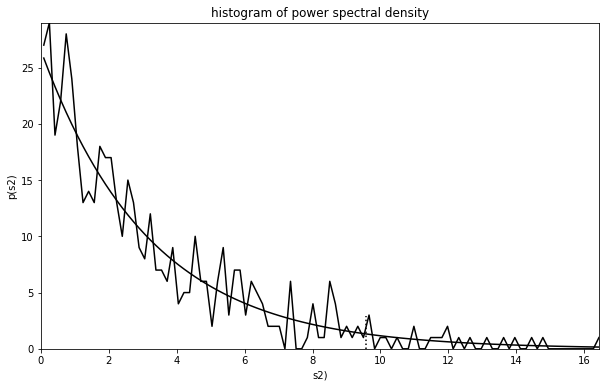

In [11]:
# eda12_09
# illustration of variance of power spectral density
# case of untapered random timeseries

# generic time set up
N=floor(2**10);
Dt=0.025;
T = N*Dt;
t = np.zeros((N,1));
t[:,0] = Dt*np.linspace(0,N-1,N); 

# create an uncorrelated random timeseries
sd2true=64.0;
sdtrue=sqrt(sd2true);
draw = np.random.normal(0,sdtrue,(N,1));

# generic frequency set up
No2 = floor(N/2);
fmax=1/(2.0*Dt);
Df=fmax/No2;
Nf=No2+1;
f=np.zeros((N,1));
f[:,0] = Df * np.concatenate( ( np.linspace(0,No2,Nf), np.linspace(-No2+1,-1,No2-1) ), axis=0 );
Dw=2*pi*Df;
w=np.zeros((N,1));
w[:,0] = Dw * np.concatenate( ( np.linspace(0,No2,Nf), np.linspace(-No2+1,-1,No2-1) ), axis=0 );
Nw=Nf;
fpos=np.zeros((Nf,1));
fpos[:,0] = Df * np.linspace(0,No2,Nf);
wpos=np.zeros((Nf,1));
wpos[:,0] = Dw * np.linspace(0,No2,Nf);              
                    
# constant window function
W = np.ones((N,1));
d = np.multiply( W, draw );

# window changes variance of signal by ff
ff = np.sum(np.multiply(W,W))/N;

# true and estimated variance of d
sd2est=np.std(d)**2;
print("true      data variance %.4f" % (ff*sd2true) );
print("estimated data variance %.4f" % (sd2est));

# compute power spectral density
fftraw = np.zeros((N,1), dtype=np.complex);
fftraw = np.fft.fft(d,axis=0);                # raw DFT output
dbar = np.zeros((Nf,1), dtype=np.complex);
dbar[:,0] = Dt*fftraw[0:Nf,0];                # Fourier transform, + freqs only
s2 = (2/T) * np.power(np.abs(dbar),2);      # power spectral density

# statistics of power spectral density
s2meanest = np.mean(s2);
s2varest=np.std(s2)**2;
s2sigmaest=sqrt(s2varest);
sd2psd=Nf*Df*s2meanest;
print("variance of data estimated from PSD %.2f" % (sd2psd));
print(' ');

# true mean and variance
p=2; # degrees of freedom
c = ( ff*sd2true ) / (2*Nf*Df);  # normalization factor
s2meantrue = p*c;
s2vartrue = 2*p*(c**2);
print("power spectral density");
print("true mean %.4f variance %.4f" % (s2meantrue,s2vartrue));
print("estimated mean %.4f variance %.4f" % (s2meanest,s2varest));
print(' ');

# plot data
fig1 = plt.figure(1,figsize=(10,6));
damax = np.amax(d);
plt.axis([0, T, -1.5*damax, 1.5*damax])
plt.plot(t,d,'k-');
plt.xlabel('time t (s)');
plt.ylabel('d(t)');
plt.title('random time series');
plt.plot([0, T], [-2*sdtrue*sqrt(ff), -2*sdtrue*sqrt(ff)], 'k-' );
plt.plot([0, T], [0, 0], 'k-', 'LineWidth', 1 );
plt.plot([0, T], [2*sdtrue*sqrt(ff), 2*sdtrue*sqrt(ff)], 'k-' );

# plot PSD
fig2 = plt.figure(2,figsize=(10,6));
plt.xlabel('frequency f (Hz)');
plt.ylabel('ss(f)');
plt.title('power spectral density');
plt.plot(fpos,s2,'k-');

# plot mean on spectra
plt.plot([0, fmax], [s2meantrue, s2meantrue],'k-');

# histogram of values
Nhist=100
s2min = np.min(s2);
s2max = np.max(s2);
ct, ed = np.histogram(s2,Nhist,(s2min,s2max));
Nc = len(ct);
Ne = len(ed);
s2hist = np.zeros((Nc,1));
s2hist[:,0]=ct;
centers = np.zeros((Ne-1,1));
centers[:,0]=0.5*(ed[1:Ne]+ed[0:Ne-1]);

# chi-squared pdf
Db=(centers[1,0]-centers[0,0])/c;
s2histtrue=Nf*Db*stats.chi2.pdf(centers/c,p);

# plot 95% confidence level on spectra
pv=0.95;
cv = stats.chi2.ppf(pv,p);
plt.plot([fpos[0,0], fpos[Nf-1,0]], [cv*c, cv*c],'k-');
plt.show();
print("%.4f confidence level is at s2 = %.4f" % (pv,cv*c) );
percent = 100 * np.sum( s2hist[centers<=cv*c]) / np.sum(s2hist);
print("%.4f percent of points are below %.4f confidence" % (percent,pv));
print(' ');

fig3 = plt.figure(3,figsize=(10,6));
plt.axis([0, np.max(centers), 0, max(s2hist) ])
plt.xlabel('s2)');
plt.ylabel('p(s2)');
plt.title('histogram of power spectral density');
plt.plot(centers,s2hist,'k-');
plt.plot(centers,s2histtrue,'k-');
plt.plot([cv*c, cv*c], [0, 0.1*max(s2hist)],'k:');
plt.show();


true      data variance 25.4092
estimated data variance 26.6966
variance of data estimated from PSD 26.72
 
power spectral density
true mean 1.2680 variance 1.6078
estimated mean 1.3335 variance 1.5545
 


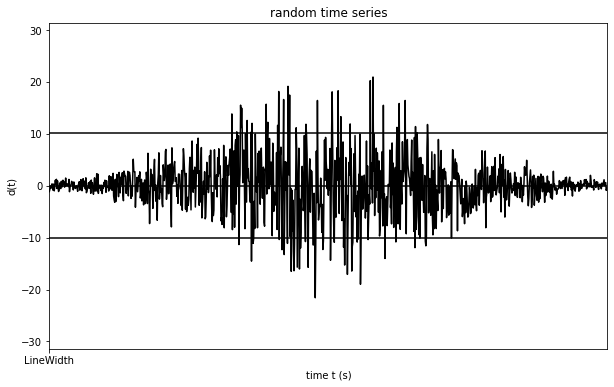

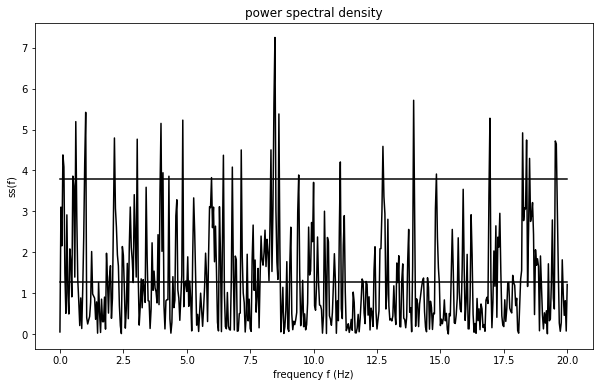

0.9500 confidence level is at s2 = 3.7985
93.9571 percent of points are below 0.9500 confidence
 


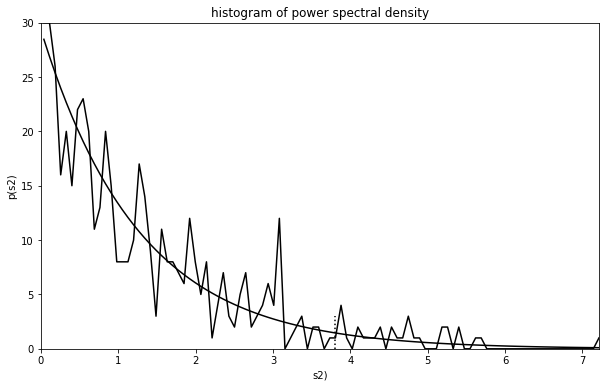

In [12]:
# eda12_10
# illustration of variance of power spectral density
# case of random timeseries tapered with Hamming window

# generic time set up
N=floor(2**10);
Dt=0.025;
T = N*Dt;
t = np.zeros((N,1));
t[:,0] = Dt*np.linspace(0,N-1,N); 

# create an uncorrelated random timeseries
sd2true=64.0;
sdtrue=sqrt(sd2true);
draw = np.random.normal(0,sdtrue,(N,1));

# generic frequency set up
No2 = floor(N/2);
fmax=1/(2.0*Dt);
Df=fmax/No2;
Nf=No2+1;
f=np.zeros((N,1));
f[:,0] = Df * np.concatenate( ( np.linspace(0,No2,Nf), np.linspace(-No2+1,-1,No2-1) ), axis=0 );
Dw=2*pi*Df;
w=np.zeros((N,1));
w[:,0] = Dw * np.concatenate( ( np.linspace(0,No2,Nf), np.linspace(-No2+1,-1,No2-1) ), axis=0 );
Nw=Nf;
fpos=np.zeros((Nf,1));
fpos[:,0] = Df * np.linspace(0,No2,Nf);
wpos=np.zeros((Nf,1));
wpos[:,0] = Dw * np.linspace(0,No2,Nf);                              

#  Hamming window function
W = np.zeros((N,1));
W[:,0] = 0.54 - 0.46*np.cos(2*pi*np.linspace(0,N-1,N)/(N-1));
d = np.multiply( W, draw );

# window changes variance of signal by ff
ff = np.sum(np.multiply(W,W))/N;

# true and estimated variance of d
sd2est=np.std(d)**2;
print("true      data variance %.4f" % (ff*sd2true) );
print("estimated data variance %.4f" % (sd2est));

# compute power spectral density
fftraw = np.zeros((N,1), dtype=np.complex);
fftraw = np.fft.fft(d,axis=0);                # raw DFT output
dbar = np.zeros((Nf,1), dtype=np.complex);
dbar[:,0] = Dt*fftraw[0:Nf,0];                # Fourier transform, + freqs only
s2 = (2/T) * np.power(np.abs(dbar),2);      # power spectral density

# statistics of power spectral density
s2meanest = np.mean(s2);
s2varest=np.std(s2)**2;
s2sigmaest=sqrt(s2varest);
sd2psd=Nf*Df*s2meanest;
print("variance of data estimated from PSD %.2f" % (sd2psd));
print(' ');

# true mean and variance
p=2; # degrees of freedom
c = ( ff*sd2true ) / (2*Nf*Df);  # normalization factor
s2meantrue = p*c;
s2vartrue = 2*p*(c**2);
print("power spectral density");
print("true mean %.4f variance %.4f" % (s2meantrue,s2vartrue));
print("estimated mean %.4f variance %.4f" % (s2meanest,s2varest));
print(' ');

# plot data
fig1 = plt.figure(1,figsize=(10,6));
damax = np.amax(d);
plt.axis([0, T, -1.5*damax, 1.5*damax])
plt.plot(t,d,'k-');
plt.xlabel('time t (s)');
plt.ylabel('d(t)');
plt.title('random time series');
plt.plot([0, T], [-2*sdtrue*sqrt(ff), -2*sdtrue*sqrt(ff)], 'k-' );
plt.plot([0, T], [0, 0], 'k-', 'LineWidth', 1 );
plt.plot([0, T], [2*sdtrue*sqrt(ff), 2*sdtrue*sqrt(ff)], 'k-' );

# plot PSD
fig2 = plt.figure(2,figsize=(10,6));
plt.xlabel('frequency f (Hz)');
plt.ylabel('ss(f)');
plt.title('power spectral density');
plt.plot(fpos,s2,'k-');

# plot mean on spectra
plt.plot([0, fmax], [s2meantrue, s2meantrue],'k-');

# histogram of values
Nhist=100
s2min = np.min(s2);
s2max = np.max(s2);
ct, ed = np.histogram(s2,Nhist,(s2min,s2max));
Nc = len(ct);
Ne = len(ed);
s2hist = np.zeros((Nc,1));
s2hist[:,0]=ct;
centers = np.zeros((Ne-1,1));
centers[:,0]=0.5*(ed[1:Ne]+ed[0:Ne-1]);

# chi-squared pdf
Db=(centers[1,0]-centers[0,0])/c;
s2histtrue=Nf*Db*stats.chi2.pdf(centers/c,p);

# plot 95% confidence level on spectra
pv=0.95;
cv = stats.chi2.ppf(pv,p);
plt.plot([fpos[0,0], fpos[Nf-1,0]], [cv*c, cv*c],'k-');
plt.show();
print("%.4f confidence level is at s2 = %.4f" % (pv,cv*c) );
percent = 100 * np.sum( s2hist[centers<=cv*c]) / np.sum(s2hist);
print("%.4f percent of points are below %.4f confidence" % (percent,pv));
print(' ');

fig3 = plt.figure(3,figsize=(10,6));
plt.axis([0, np.max(centers), 0, max(s2hist) ])
plt.xlabel('s2)');
plt.ylabel('p(s2)');
plt.title('histogram of power spectral density');
plt.plot(centers,s2hist,'k-');
plt.plot(centers,s2histtrue,'k-');
plt.plot([cv*c, cv*c], [0, 0.1*max(s2hist)],'k:');
plt.show();


true      data variance 25.4092
estimated data variance 25.8134
variance of data estimated from PSD 25.92
 
power spectral density
true mean 1.2680 variance 1.6078
estimated mean 1.2934 variance 1.6670
 


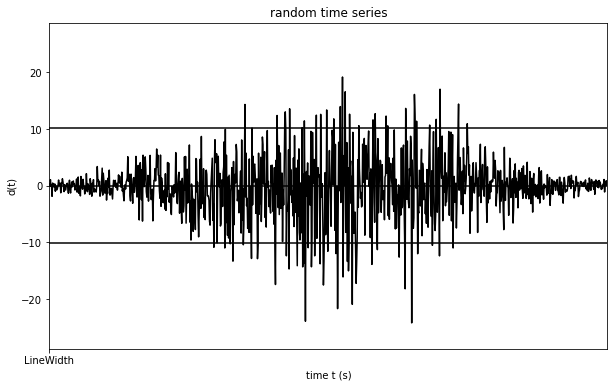

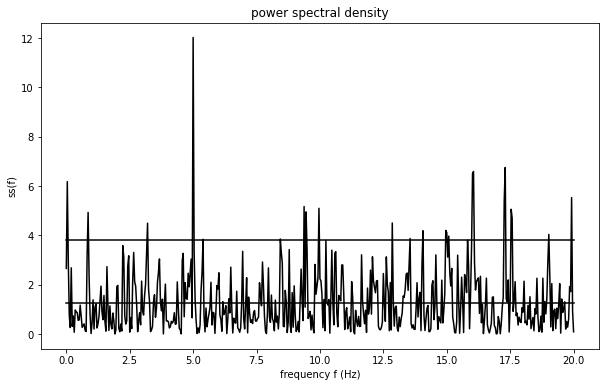

0.9500 confidence level is at s2 = 3.7985
95.7115 percent of points are below 0.9500 confidence
 


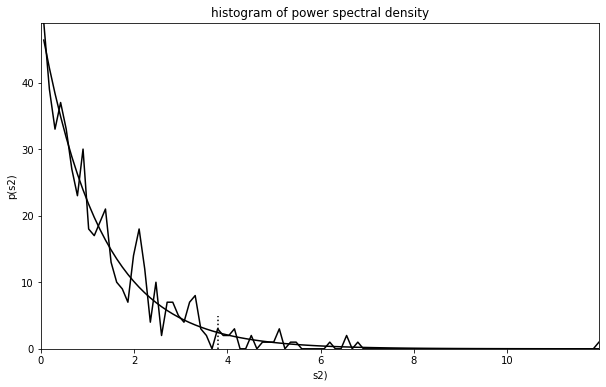

In [13]:
# eda12_11
# illustration of variance of power spectral density
# case of low amplitude cosine signal buried in random noise, tapered with Hamming window

# generic time setup
N=floor(2**10);
Dt=0.025;
T = N*Dt;
t = np.zeros((N,1));
t[:,0]=Dt*np.linspace(0,N-1,N); 

# generic time/frequency set up
No2 = floor(N/2);
fmax=1/(2.0*Dt);
Df=fmax/No2;
Nf=No2+1;
f=np.zeros((N,1));
f[:,0] = Df * np.concatenate( ( np.linspace(0,No2,Nf), np.linspace(-No2+1,-1,No2-1) ), axis=0 );
Dw=2*pi*Df;
w=np.zeros((N,1));
w[:,0] = Dw * np.concatenate( ( np.linspace(0,No2,Nf), np.linspace(-No2+1,-1,No2-1) ), axis=0 );
Nw=Nf;
fpos=np.zeros((Nf,1));
fpos[:,0] = Df * np.linspace(0,No2,Nf);
wpos=np.zeros((Nf,1));
wpos[:,0] = Dw * np.linspace(0,No2,Nf);     

# low amplitude periodic signal buried in the noise
sd2true=64.0;
sdtrue=sqrt(sd2true);
draw = 0.25*sdtrue*np.cos(2*pi*(fmax/4)*t) + np.random.normal(0,sdtrue,(N,1));                

#  Hamming window function
W = np.zeros((N,1));
W[:,0] = 0.54 - 0.46*np.cos(2*pi*np.linspace(0,N-1,N)/(N-1));
d = np.multiply( W, draw );

# window changes variance of signal by ff
ff = np.sum(np.multiply(W,W))/N;

# true and estimated variance of d
sd2est=np.std(d)**2;
print("true      data variance %.4f" % (ff*sd2true) );
print("estimated data variance %.4f" % (sd2est));

# compute power spectral density
fftraw = np.zeros((N,1), dtype=np.complex);
fftraw = np.fft.fft(d,axis=0);                # raw DFT output
dbar = np.zeros((Nf,1), dtype=np.complex);
dbar[:,0] = Dt*fftraw[0:Nf,0];                # Fourier transform, + freqs only
s2 = (2/T) * np.power(np.abs(dbar),2);      # power spectral density

# statistics of power spectral density
s2meanest = np.mean(s2);
s2varest=np.std(s2)**2;
s2sigmaest=sqrt(s2varest);
sd2psd=Nf*Df*s2meanest;
print("variance of data estimated from PSD %.2f" % (sd2psd));
print(' ');

# true mean and variance
p=2; # degrees of freedom
c = ( ff*sd2true ) / (2*Nf*Df);  # normalization factor
s2meantrue = p*c;
s2vartrue = 2*p*(c**2);
print("power spectral density");
print("true mean %.4f variance %.4f" % (s2meantrue,s2vartrue));
print("estimated mean %.4f variance %.4f" % (s2meanest,s2varest));
print(' ');

# plot data
fig1 = plt.figure(1,figsize=(10,6));
damax = np.amax(d);
plt.axis([0, T, -1.5*damax, 1.5*damax])
plt.plot(t,d,'k-');
plt.xlabel('time t (s)');
plt.ylabel('d(t)');
plt.title('random time series');
plt.plot([0, T], [-2*sdtrue*sqrt(ff), -2*sdtrue*sqrt(ff)], 'k-' );
plt.plot([0, T], [0, 0], 'k-', 'LineWidth', 1 );
plt.plot([0, T], [2*sdtrue*sqrt(ff), 2*sdtrue*sqrt(ff)], 'k-' );

# plot PSD
fig2 = plt.figure(2,figsize=(10,6));
plt.xlabel('frequency f (Hz)');
plt.ylabel('ss(f)');
plt.title('power spectral density');
plt.plot(fpos,s2,'k-');

# plot mean on spectra
plt.plot([0, fmax], [s2meantrue, s2meantrue],'k-');

# histogram of values
Nhist=100
s2min = np.min(s2);
s2max = np.max(s2);
ct, ed = np.histogram(s2,Nhist,(s2min,s2max));
Nc = len(ct);
Ne = len(ed);
s2hist = np.zeros((Nc,1));
s2hist[:,0]=ct;
centers = np.zeros((Ne-1,1));
centers[:,0]=0.5*(ed[1:Ne]+ed[0:Ne-1]);

# chi-squared pdf
Db=(centers[1,0]-centers[0,0])/c;
s2histtrue=Nf*Db*stats.chi2.pdf(centers/c,p);

# plot 95% confidence level on spectra
pv=0.95;
cv = stats.chi2.ppf(pv,p);
plt.plot([fpos[0,0], fpos[Nf-1,0]], [cv*c, cv*c],'k-');
plt.show();
print("%.4f confidence level is at s2 = %.4f" % (pv,cv*c) );
percent = 100 * np.sum( s2hist[centers<=cv*c]) / np.sum(s2hist);
print("%.4f percent of points are below %.4f confidence" % (percent,pv));
print(' ');

fig3 = plt.figure(3,figsize=(10,6));
plt.axis([0, np.max(centers), 0, max(s2hist) ])
plt.xlabel('s2)');
plt.ylabel('p(s2)');
plt.title('histogram of power spectral density');
plt.plot(centers,s2hist,'k-');
plt.plot(centers,s2histtrue,'k-');
plt.plot([cv*c, cv*c], [0, 0.1*max(s2hist)],'k:');
plt.show();


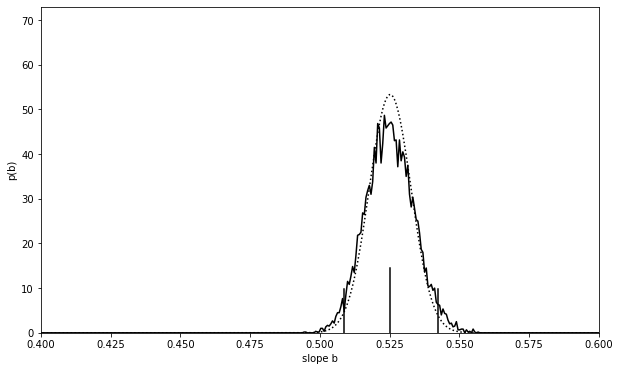

standard method:   slope 0.5252 +/- 0.0150 (2 sigma)
bootstrap method:  slope 0.5251 +/- 0.0173 (2 sigma)
bootstrap method:  slope between 0.5087 and 0.5423 (95 percent confidence)


In [14]:
# eda12_12
# illustration of Bootstrap statistics of slope in least
# squares fit of a straight line to a small fragment of
# Black Rock Forest temperature data

# load data and set up time axis
D=np.genfromtxt('brf_fragment.txt', delimiter='\t');
s = np.shape(D);
N = s[0];
torig = np.zeros((N,1));
torig[:,0] = 10+np.linspace(0,N-1,N);  # hours from start of orignal record
dorig = np.zeros((N,1));
dorig[:,0] = D;

# least-squares slope and its variance of original data
M=2;
G=np.zeros((N,M));
G[:,0]=np.ones((N,));
G[:,1]=torig.ravel();
GTG = np.matmul(G.T,G);
mest=  la.solve( GTG, np.matmul(G.T,dorig) );
slopeorig=mest[1,0];
    
# usual error estimate based on propagagtion
# of posterior estimate of sigma2 of data into
# a sigma2 of slope
e = dorig - np.matmul(G,mest);
E = np.matmul(e.T,e);
sigma2dorig = E/N;
Cmorig = sigma2dorig * la.inv(GTG);
sigma2morig = Cmorig[1,1];

# number of realizations;
Nr = 10000;
slope = np.zeros((Nr,1));

# loop over realizations
for p in range(Nr):
    
    # resample
    rowindex=np.random.randint(N,size=N);
    t = np.zeros((N,1));
    t[:,0] = torig[rowindex,0];
    d = np.zeros((N,1));
    d[:,0] = dorig[rowindex,0];
    # straight line fit
    M=2;
    G=np.zeros((N,M));
    G[:,0]=np.ones((N,));
    G[:,1]=t.ravel();
    GTG = np.matmul(G.T,G);
    mest=  la.solve( GTG, np.matmul(G.T,d) );
    slope[p,0]=mest[1,0];

# compute histogram of slopes and normalize
# normalize to a probability density distribution
# with Dt*sum(pbootstrap)=1;

Nhist=1000
slopemin = 0.2;
slopemax = 0.8;
ct, ed = np.histogram(slope,Nhist,(slopemin,slopemax));
Nc = len(ct);
Ne = len(ed);
slopehist = np.zeros((Nc,1));
slopehist[:,0]=ct;
centers = np.zeros((Ne-1,1));
centers[:,0]=0.5*(ed[1:Ne]+ed[0:Ne-1]);

# approximate pdf via normalized histogram
Ds = centers[1,0] - centers[0,0];
norm = Ds*np.sum(slopehist);
pbootstrap =slopehist/norm;

# compute Normal distribution of slopes
# using parameters estimated from original data
norm = (1/sqrt(2*pi*sigma2morig));
pnormal = norm * np.exp(-np.power((centers-slopeorig),2)/(2*sigma2morig));

# plot pdf
fig1 = plt.figure(1,figsize=(10,6));
pdfmax = np.max(pbootstrap);
plt.axis([0.4, 0.6, 0, 1.5*pdfmax]);
plt.plot(centers,pbootstrap,'k-');
plt.plot(centers,pnormal,'k:');
plt.xlabel('slope b');
plt.ylabel('p(b)');

# mean (expectation) and variance of bootstrap distibution
mb = Ds*np.sum( np.multiply( centers, pbootstrap) );
vb = Ds*np.sum( np.multiply( np.power(centers-mb,2) , pbootstrap) );

# 5% and 95% confidence of bootstrap distibution
Pbootstrap = np.zeros((Nc,1));
Pbootstrap[:,0] = Ds*np.cumsum(pbootstrap);

ilovec = np.where( (Pbootstrap>=0.025).ravel() );
ilox = ilovec[0];
ilo = ilox[0];
blo = centers[ilo];

ihivec = np.where(Pbootstrap>=0.975);
ihix = ihivec[0];
ihi = ihix[0]
bhi = centers[ihi];

plt.plot( [blo, blo], [0, 0.2*pdfmax], 'k-'  );
plt.plot( [bhi, bhi], [0, 0.2*pdfmax], 'k-'  );
plt.plot( [mb, mb], [0, 0.3*pdfmax], 'k-'  );
plt.show();

print("standard method:   slope %.4f +/- %.4f (2 sigma)" % (slopeorig, 2*sqrt(sigma2morig)));
print("bootstrap method:  slope %.4f +/- %.4f (2 sigma)" % (mb, 2*sqrt(vb)))
print("bootstrap method:  slope between %.4f and %.4f (95 percent confidence)" % (blo, bhi));


CaO/Na2O ratio of Factor 2
mean 0.485729 variance 0.000193


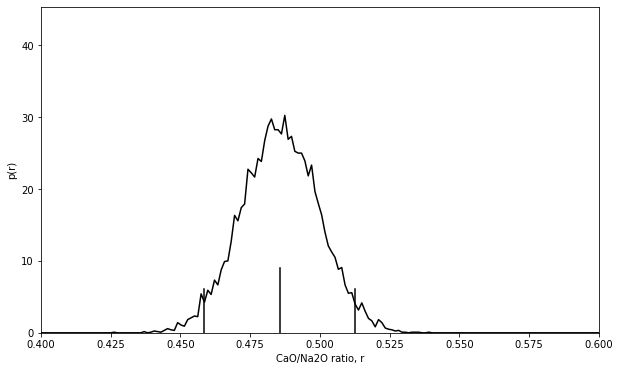

bootstrap method:  ratio 0.4857 +/- 0.0278 (2 sigma)
bootstrap method:  ratio between 0.4586 and 0.5126 (95 percent confidence)


In [16]:
# eda12_13
# Atlantic Rocks dataset
# bootstrap error analysis for
# CaO/Na2O ratio of varimax factor 2
# note CaO/Na2O are elements 6/7

# load data
Draw = np.genfromtxt('rocks.txt', delimiter='\t')
N, M = np.shape(Draw);

# number of realizations
Nr=10000;
ratio = np.zeros((Nr,1));

for ir in range(Nr):

    # resample
    rowindex=np.random.randint(N,size=N);
    D = np.zeros((N,M));
    D[:,:] = Draw[rowindex,:];

    # compute factors and factor loadings using singular value decompostion
    [U, s, VT] = la.svd(D,full_matrices=False);
    sh = np.shape(s);
    Ns = sh[0];

    # keep only first few singular values
    P=5;
    F = np.copy(VT[0:P,:]);
    C = np.matmul( U[:,0:P], np.diag(s[0:P]));
    
    # spike these factors using the varimax procedure
    k = [1, 2, 3, 4];
    Nk = len(k);

    # initial rotated factor matrix, FP, abd rotation matrix, MR
    MR=np.identity(P);
    FP=np.copy(F);
    
    fA = np.zeros((M,1));
    fB = np.zeros((M,1));
    fAp = np.zeros((M,1));
    fBp = np.zeros((M,1));
    mA = np.zeros((P,1));
    mB = np.zeros((P,1));
    mAp = np.zeros((P,1));
    mBp = np.zeros((P,1));
    for iter in range(3):
        for ii in range(Nk):
            for jj in range(ii+1,Nk):
                # spike factors i and j
                i=k[ii];
                j=k[jj];
                # copy factors from matrix to vectors
                fA[:,0] = np.copy(FP[i,:]);
                fB[:,0] = np.copy(FP[j,:]);
                # standard varimax procedure to determine rotation angle q
                u = np.power(fA,2) - np.power(fB,2);
                v = 2.0 * np.multiply(fA, fB);
                AA = 2*M*np.matmul(u.T,v);
                BB = np.sum(u)*np.sum(v);
                top = AA - BB;
                CC = M*(np.matmul(u.T,u)-np.matmul(v.T,v));
                DD = (np.sum(u)**2)-(np.sum(v)**2);
                bot =  CC - DD;
                q = 0.25 * atan2(top,bot);
                # rotate factors
                cq = cos(q);
                sq = sin(q);
                fAp =  cq*fA + sq*fB;
                fBp = -sq*fA + cq*fB;
                # put back into factor matrix, FP
                FP[i,:] = fAp.ravel();
                FP[j,:] = fBp.ravel();
                # accumulate rotation
                mA[:,0] = np.copy(MR[i,:]);
                mB[:,0] = np.copy(MR[j,:]);
                mAp =  cq*mA + sq*mB;
                mBp = -sq*mA + cq*mB;
                MR[i,:] = mAp.ravel();
                MR[j,:] = mBp.ravel();

    # new factor loadings
    CP = np.matmul(C,MR.T);
    
    # MATLAB: ratio of elemnts 6 and 7 of factor 2 
    # Python: ratio of elemnts 5 and 6 of factor 1
    ratio[ir,0]=FP[1,5]/FP[1,6];

Nhist=500;
ratiomin = 0.2;
ratiomax = 0.8;
ct, ed = np.histogram(ratio,Nhist,(ratiomin,ratiomax));
Nc = len(ct);
Ne = len(ed);
ratiohist = np.zeros((Nc,1));
ratiohist[:,0]=ct;
centers = np.zeros((Ne-1,1));
centers[:,0]=0.5*(ed[1:Ne]+ed[0:Ne-1]);

# approximate pdf via normalized histogram
Dr = centers[1,0] - centers[0,0];
norm = Dr*np.sum(ratiohist);
pbootstrap = ratiohist/norm;

# mean (expectation) and variance of bootstrap distibution
mr = Dr*np.sum( np.multiply( centers, pbootstrap) );
vr = Dr*np.sum( np.multiply( np.power(centers-mr,2) , pbootstrap) );
print("CaO/Na2O ratio of Factor 2");
print("mean %.6f variance %.6f" % (mr,vr) );

# 5% and 95% confidence of bootstrap distibution
Pbootstrap = np.zeros((Nc,1));
Pbootstrap[:,0] = Dr*np.cumsum(pbootstrap);

ilovec = np.where( (Pbootstrap>=0.025).ravel() );
ilox = ilovec[0];
ilo = ilox[0];
blo = centers[ilo];

ihivec = np.where(Pbootstrap>=0.975);
ihix = ihivec[0];
ihi = ihix[0]
bhi = centers[ihi];

# plot pdf
fig1 = plt.figure(1,figsize=(10,6));
pdfmax = np.max(pbootstrap);
plt.axis([0.4, 0.6, 0, 1.5*pdfmax]);
plt.plot(centers,pbootstrap,'k-');
plt.xlabel('CaO/Na2O ratio, r');
plt.ylabel('p(r)');

plt.plot( [blo, blo], [0, 0.2*pdfmax], 'k-'  );
plt.plot( [bhi, bhi], [0, 0.2*pdfmax], 'k-'  );
plt.plot( [mr, mr], [0, 0.3*pdfmax], 'k-'  );
plt.show();

print("bootstrap method:  ratio %.4f +/- %.4f (2 sigma)" % (mr, 2*sqrt(vr)))
print("bootstrap method:  ratio between %.4f and %.4f (95 percent confidence)" % (blo, bhi));


